# Train cycleGAN

Scripts to train cycleGAN were adopted from [https://github.com/eriklindernoren/PyTorch-GAN#cyclegan] and modified to 1) use fully connected networks as opposed to convoultional neural networks and 2) input gene expression data as opposed to image data

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.random import seed
randomState = 123
seed(randomState)

In [2]:
# Load arguments
data_file = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    "data","pseudomonas","train", "A", "all-pseudomonas-gene-normalized.zip")

In [3]:
# Read in data
data = pd.read_table(data_file, header=0, sep='\t', index_col=0, compression='zip').T
original_shape = data.shape
print(original_shape)
data.head(5)

(1191, 5549)


Gene_symbol,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
0.1_12hr_CSV86(Pae_G1a).CEL,0.472897,0.396658,0.253776,0.000000,0.175640,0.554385,0.411370,0.382222,0.310144,0.642522,...,0.358597,0.390048,0.457406,0.684082,0.338351,0.608325,0.643496,0.276075,0.112773,0.145170
0.1_2hr_CSV86(Pae_G1a).CEL,0.262346,0.086216,0.359853,0.439214,0.269749,0.768433,0.212505,0.062043,0.567695,0.467073,...,0.358504,0.414206,0.389879,0.477693,0.000000,0.479385,0.154471,0.140891,0.167505,0.157060
0.1_6hr_CSV86(Pae_G1a).CEL,0.473658,0.244862,0.330750,0.097697,0.387226,0.328319,0.228820,0.330039,0.318081,0.512864,...,0.180744,0.380741,0.173501,0.251571,0.182793,0.528301,0.504985,0.499782,0.061106,0.365612
0.1_7hr_CSV86(Pae_G1a).CEL,0.439273,0.343402,0.192698,0.274677,0.628979,0.553796,0.431391,0.363480,0.385721,0.094584,...,0.346837,0.153927,0.067349,0.319723,0.282442,0.490655,0.531415,0.153880,0.132333,0.260087
0.1_9hr_CSV86(Pae_G1a).CEL,0.220827,0.145525,0.437803,0.293201,0.635120,0.462893,0.488733,0.309584,0.318646,0.591914,...,0.237726,0.301945,0.070222,0.513605,0.114277,0.360259,0.386868,0.223995,0.105343,0.102088


## Train

In [4]:
%run cyclegan_transcript.py --dataset_name "pseudomonas" --n_epochs 200 --decay_epoch 100 --input_dim 5549 --hidden_dim 1000 --output_dim 100 --num_samples 1191 --batch_size 100

Namespace(b1=0.5, b2=0.999, batch_size=100, checkpoint_interval=-1, dataset_name='pseudomonas', decay_epoch=100, epoch=0, hidden_dim=1000, input_dim=5549, lambda_cyc=10.0, lambda_id=5.0, lr=0.0002, n_cpu=8, n_epochs=200, n_residual_blocks=1, num_samples=1191, output_dim=100, sample_interval=100)
(1191, 5549)
[Epoch 199/200] [Batch 11/12] [D loss: 0.247083] [G loss: 1.164957, adv: 0.255205, cycle: 0.060771, identity: 0.060408] ETA: 0:00:00.534383

## Plot

In [5]:
# Read in loss files
G_loss_file = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    "data","pseudomonas","train", "G_loss.txt")

D_loss_file = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    "data","pseudomonas","train","D_loss.txt")

G_loss_data = pd.read_csv(G_loss_file, header=None, sep=',').T
D_loss_data = pd.read_csv(D_loss_file, header=None, sep=',').T

In [6]:
G_loss_data

,0
0,2.536982
1,2.018601
2,2.038757
3,2.078297
4,2.197287
5,2.137244
6,2.042018
7,2.089973
8,2.134730
9,2.193964


In [7]:
D_loss_data

,0
0,0.326358
1,0.252659
2,0.255882
3,0.248796
4,0.252302
5,0.260279
6,0.250257
7,0.246466
8,0.235766
9,0.283024


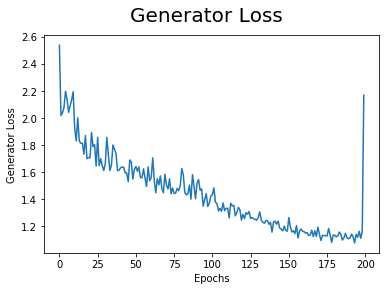

In [8]:
# Generator loss
G_loss_out_file = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    "data","pseudomonas","train", "G_loss_plot.jpg")

fig = plt.figure()
plt.plot(G_loss_data.index, G_loss_data.values)
fig.suptitle('Generator Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Generator Loss')
fig.savefig(G_loss_out_file)

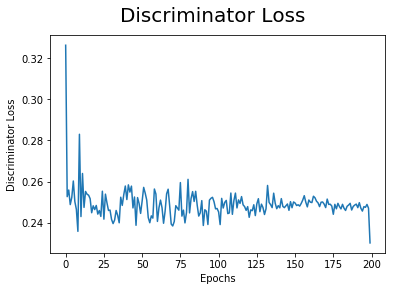

In [9]:
# Discriminator loss
D_loss_out_file = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    "data","pseudomonas","train","D_loss_plot.jpg")

fig = plt.figure()
plt.plot(D_loss_data.index, D_loss_data.values)
fig.suptitle('Discriminator Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Discriminator Loss')
fig.savefig(D_loss_out_file)